<a href="https://colab.research.google.com/github/kvs23/ML/blob/main/MNIST%20dataset%20predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [131]:
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()

In [132]:
Xtrain.shape,Ytrain.shape,Ytest.shape

((60000, 28, 28), (60000,), (10000,))

In [133]:
#reshaping the Data
xtrain=Xtrain.reshape(-1,784)
xtest=Xtest.reshape(-1,784)


In [134]:
xtrain.shape

(60000, 784)

In [135]:
##converting y in one hot encoded
ytrain=np.zeros([60000,10])
for i in range(60000):
    ytrain[i,Ytrain[i]]=1
ytest=np.zeros([10000,10])
for i in range(10000):
    ytest[i,Ytest[i]]=1

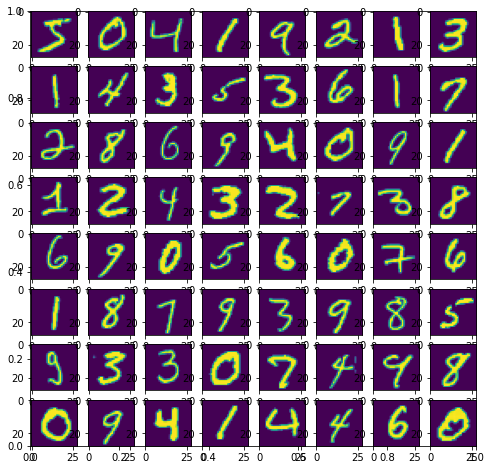

In [136]:
##Seeing what images look like(These are single channel images of 10 digits)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(Xtrain[i])

***USING LOGISTIC REGRESSION FROM SKLEARN***

In [177]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=1000)
clf.fit(xtrain,Ytrain)
print("ACCURACY FROM LOGISTIC REGRESSION=",clf.score(xtest,Ytest)*100)


ACCURACY FROM LOGISTIC REGRESSION= 92.09


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [181]:
#This gives an accuracy of 92.09%
#classification measures
from sklearn.metrics import confusion_matrix,classification_report
ypred=clf.predict(xtest)
print(confusion_matrix(ypred,Ytest))


[[ 954    0    5    3    3   12   10    4    7    8]
 [   0 1109   12    1    3    5    3    7   14    7]
 [   4    8  917   18    6    3    9   24    5    1]
 [   2    3   18  921    4   36    2    9   20    9]
 [   1    0   12    2  909   12    7    4    8   21]
 [   5    1    6   23    0  761   18    2   22    7]
 [   6    3   11    3   10   16  906    0   10    1]
 [   4    2    9   11    7    6    1  946   14   22]
 [   4    9   39   22   10   35    2    3  863   10]
 [   0    0    3    6   30    6    0   29   11  923]]


***DECISION TREE FROM SKLEARN***

In [182]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(xtrain,Ytrain)
print("ACCURACY FROM LOGISTIC REGRESSION=",clf.score(xtest,Ytest)*100)

ACCURACY FROM LOGISTIC REGRESSION= 88.02


In [183]:
##THIS MODEL GIVES AN ACCURACY OF 88.02%

**RANDOM FOREST FROM SKLEARN**

In [184]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=0,max_depth=6)
clf.fit(xtrain,Ytrain)
print("ACCURACY FROM LOGISTIC REGRESSION=",clf.score(xtest,Ytest)*100)

ACCURACY FROM LOGISTIC REGRESSION= 89.2


In [ ]:
##THIS MODEL GIVES AN ACCURACY OF 89.2%

***SVM FROM SKLEARN***

In [185]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(xtrain,Ytrain)
print("ACCURACY FROM LOGISTIC REGRESSION=",clf.score(xtest,Ytest)*100)

ACCURACY FROM LOGISTIC REGRESSION= 97.92


In [186]:
##THIS MODEL GIVES AN ACCURACY OF 97.92

***NAIVE BAYES FROM SKLEARN***

In [187]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(xtrain,Ytrain)
print("ACCURACY FROM LOGISTIC REGRESSION=",clf.score(xtest,Ytest)*100)

ACCURACY FROM LOGISTIC REGRESSION= 55.58


In [ ]:
##THIS MODEL GIVES AN ACCURACY OF 55.58%

***NEURAL NETWORKS***

**USING NEURAL NETWORKS WITHOUT CNN LAYERS**

In [118]:
#initializing weights and biases
n_input=784
n_hidden1=512
n_hidden2=512
n_classes=10
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'o':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
}
bias={
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'o':tf.Variable(tf.random_normal([n_classes]))
}

In [ ]:
#forward propagation
def forwardpropagation(Xtrain,weights,bias):
    layer1=tf.add(tf.matmul(Xtrain,weights['h1']),bias['h1'])
    outputl1=tf.nn.relu(layer1)
    
    layer2=tf.add(tf.matmul(outputl1,weights['h2']),bias['h2'])
    outputl2=tf.nn.relu(layer2)
    
    finaloutput=tf.add(tf.matmul(outputl2,weights['o']),bias['o'])
    return finaloutput

In [ ]:

x=tf.placeholder('float',[None,n_input])
y=tf.placeholder('float',[None,n_classes])
pred=forwardpropagation(x,weights,bias)

In [ ]:
#cost function
J=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
##Optimizer initialization
optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
optimize=optimizer.minimize(J)

In [ ]:
##initializing the session
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
e=[]
for i in range(1000):
    c,a=sess.run([J,optimize],feed_dict={x:xtrain,y:ytrain})
    e.append(c)

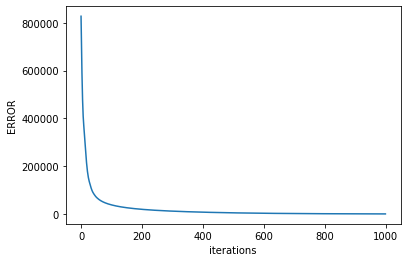

In [ ]:
import matplotlib.pyplot as plt
plt.plot(e)
plt.xlabel("iterations")
plt.ylabel("ERROR")
plt.show()
##ERROR GRAPH

In [ ]:
predictions=tf.argmax(pred,-1)
labels=tf.argmax(y,-1)
predicted=sess.run(predictions,feed_dict={x:xtest})
correct=tf.equal(predicted,labels)
totalcorrect=sess.run(correct,feed_dict={y:ytest})
a=totalcorrect.sum()/100
print("The Accuracy is=",a)

The Accuracy is= 93.12


In [ ]:
##WE GET AN ACCURACY OF 93.12% using this model

stochastic gradient descent


In [ ]:
###for batch gradient
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001)
optimize=optimizer.minimize(J)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
#### batch gradient descent
ei=[]
for i in range(50):
    error=0
    for j in range(1200):
        X=xtrain[i*50:(i+1)*50,:]
        Y=ytrain[i*50:(i+1)*50,:]
        c,a=sess.run([J,optimize],feed_dict={x:X,y:Y})
        error+=c
    ei.append(error)

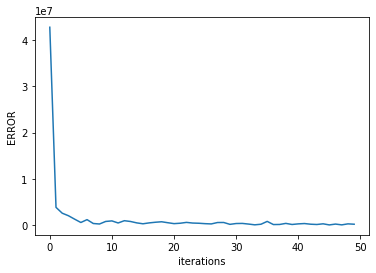

In [172]:
#error at each iteration
plt.plot(ei)

plt.xlabel("iterations")
plt.ylabel("ERROR")
plt.show()

In [ ]:
predictions=tf.argmax(pred,-1)
labels=tf.argmax(y,-1)
predicted=sess.run(predictions,feed_dict={x:xtest})
correct=tf.equal(predicted,labels)
totalcorrect=sess.run(correct,feed_dict={y:ytest})
a=totalcorrect.sum()
print("total accuracy=",a/100)

total accuracy= 81.75


In [ ]:
##Accuracy of 81.75% is just reached in 50 iterations using batch gradient descent

***NOW adding CNN layers and checking the result***

In [157]:
##initializing the number of parameters for the CNN layers and hidden layers
inputpixels=784
input_height=28
input_width=28
input_channels=1
##As the session is crashing again and again we have to reduce the number of units in cnn layer as we dont have enough RAM to run the functions)
ncv1=20
ncv1k=5
s1=1
maxpool1=2

ncv2=32
ncv2k=5
s2=1
maxpool2=2

n_hidden=1024
n_classes=10

input_size_to_hidden=(input_width*input_height*ncv2)//((maxpool1*maxpool2)**2)

In [158]:
##initializing the weights and bias
weights={
    'cv1':tf.Variable(tf.random.normal([ncv1k,ncv1k,input_channels,ncv1])),
    'cv2':tf.Variable(tf.random.normal([ncv2k,ncv2k,ncv1,ncv2])),
    'h1':tf.Variable(tf.random.normal([input_size_to_hidden,n_hidden])),
    'out':tf.Variable(tf.random.normal([n_hidden,n_classes]))
}

bias={
    'cv1':tf.Variable(tf.random.normal([ncv1])),
    'cv2':tf.Variable(tf.random.normal([ncv2])),
    'h1':tf.Variable(tf.random.normal([n_hidden])),
    'out':tf.Variable(tf.random.normal([n_classes]))
    
}

In [159]:
## Initializing x and y as placeholders for tensorflow
x=tf.placeholder("float",[None,inputpixels])
y=tf.placeholder("float",[None,n_classes])


In [160]:
##functions for CNN layer and pooling layer
def conv(x,weights,bias,k):
    out=tf.nn.conv2d(x,weights,padding="SAME",strides=[1,k,k,1])
    out=tf.nn.bias_add(out,bias)
    out=tf.nn.relu(out)
    return out
def maxpooling(x,k=2):
    return tf.nn.max_pool(x,padding="SAME",ksize=[1,k,k,1],strides=[1,k,k,1])

In [161]:
##Forward propagation function
def forwardcnn(x,weights,bias):
    xnew=tf.reshape(x,shape=[-1,input_height,input_width,1])
    c1=conv(xnew,weights["cv1"],bias['cv1'],s1)
    c1pool=maxpooling(c1,maxpool1)
    
    c2=conv(c1pool,weights["cv2"],bias['cv2'],s2)
    c2pool=maxpooling(c2,maxpool2)
    
    X_hidden=tf.reshape(c2pool,shape=[-1,input_size_to_hidden])
    hidden=tf.add(tf.matmul(X_hidden,weights["h1"]),bias['h1'])
    houtput=tf.nn.relu(hidden)
    
    output=tf.add(tf.matmul(houtput,weights['out']),bias['out'])
    return output
    
    

In [162]:
##Predicted value after forward propagation
pred=forwardcnn(x,weights,bias)

In [163]:
#costfunction(cost entropy cost function)
J=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))

In [164]:
##defining the optimizer(We took Adam optimizer)
optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
optimize=optimizer.minimize(J)

In [165]:
##initializing the session and the global variables
sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [167]:
##backward propagation
error=[]
for i in range(1000):
    c,a=sess.run([J,optimize],feed_dict={x:xtrain,y:ytrain})
    error.append(c)

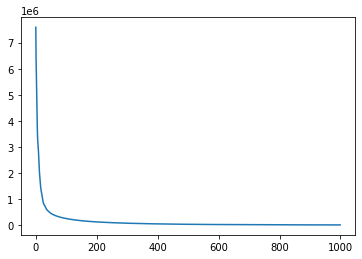

In [168]:
plt.plot(error)
plt.show()

In [171]:
predictions =tf.argmax(pred,1)
correctlabels=tf.argmax(y,1)
predval=sess.run(predictions,feed_dict={x:xtest})
correctpredictions=tf.equal(predval,correctlabels)
correct=sess.run(correctpredictions,feed_dict={y:ytest})
a=(correct.sum()/100)
print("The accuracy is=",a)

The accuracy is= 96.41


In [173]:
#This model gives an accuracy of 96.41% but takes a lot of time and resources to train